# Question - 2

In [1]:
import numpy as np
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plot
import random
from mpl_toolkits import mplot3d
import matplotlib.axes as axes

### Generating The datasets

In [2]:
def rosenborck_function(x, y):
    return x**2 + 100*((y-x**2)**2)

def generate_points(n, t):
    '''
    We shall use this function to generate the points with random initialisation 
    as mentioned in the question. We shall take the points from the range ...
    [-10, 10]^2
    x is the 1st argument
    y is the 2nd argument
    '''
    training_set_x = []
    training_set_y = []
    for i in range(n):
        training_set_x += [[random.uniform(-t, t), random.uniform(-t, t)]]
        training_set_y += [rosenborck_function(training_set_x[i][0], training_set_x[i][1])]
    training_set_y = np.array(training_set_y)
    training_set_x = np.array(training_set_x)
    return training_set_x, training_set_y
data_points = 500
t = 3
training_set_x, training_set_y = generate_points(data_points, t)

In [3]:
pd.DataFrame(training_set_y)

,0
0,2225.485498
1,304.362022
2,15.438751
3,22.921810
4,376.670260
...,...
495,1073.619206
496,4757.125813
497,8.704543
498,1532.689557


In [4]:
pd.DataFrame(training_set_x)

,0,1
0,-2.242142,0.315028
1,0.169882,-1.715655
2,1.301425,1.322963
3,-1.828762,2.901905
4,0.568635,-1.616620
...,...,...
495,-1.595150,-0.728223
496,-2.872426,1.359622
497,-0.471170,-0.069247
498,1.544995,-1.524899


In [5]:
def plot_points(training_set_x, training_set_y):
    # fig = plot.figure()
    # ax = plot.axes(projection = '3d', )
    # ax.scatter3D([i[0] for i in training_set_x], [i[1] for i in training_set_x], training_set_y, color = 'black')
    z = []
    for i in range(len(training_set_x)):
        for j in range(len(training_set_x)):
            temp_dict = dict()
            temp_dict['x'] = training_set_x[i][0]
            temp_dict['y'] = training_set_x[j][1]
            temp_dict['function'] = rosenborck_function(training_set_x[i][0], training_set_x[j][1])
            z += [temp_dict]
    return z
temp = pd.DataFrame(plot_points(training_set_x, training_set_y))
temp

,x,y,function
0,-2.242142,0.315028,2225.485498
1,-2.242142,-1.715655,4551.638203
2,-2.242142,1.322963,1377.165128
3,-2.242142,2.901905,456.715841
4,-2.242142,-1.616620,4419.063672
...,...,...,...
249995,2.235789,-0.728223,3284.822841
249996,2.235789,1.359622,1329.325310
249997,2.235789,-0.069247,2573.459796
249998,2.235789,-1.524899,4260.799999


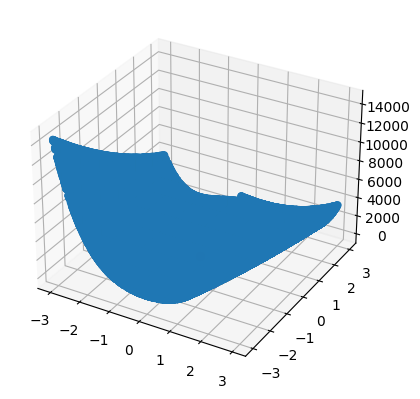

In [6]:
fig = plot.figure()
ax = plot.axes(projection='3d',)
plot.plot(0, 0, 0, 'ro')
ax.scatter3D(list(temp['x']), list(temp['y']), list(temp['function']))
plot.savefig('./data.png')
plot.show()

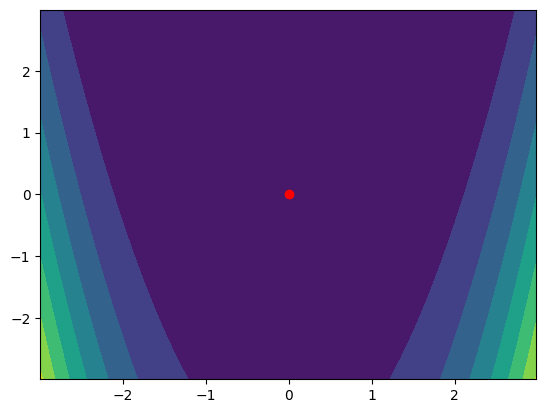

In [7]:
fig = plot.figure()
plot.plot(0, 0, 0, 'ro')
plot.tricontourf(list(temp['x']), list(temp['y']), list(temp['function']))
# plot.savefig('./data.png')
plot.show()

### Question - 2.1 - Optimising the function using gradient descent
Notes: 
1. To avoid overflow, there has been a max limit set up on the inital parameters. 
2. Even in that case, we can possibly encounter some cases of overflows. Hence, the random initialisation has been used to ease testing. In case you notice overflow messages, like the one in ```/q2/overflow.png```, re-run the cell.
3. Initial Parameters:
   1. Loss for convergence - stored in variable ```tolerence``` = 0.0001
   2. Learning Rate - stored in variable ```learning_rate``` = 0.02
   3. Max Epochs - Stored in variable ```epochs``` = 10000

#### Movement Plotter

In [8]:
def contour_plot(seq_1, loss_seq_1, ground_truth):
    fig = plot.figure()
    ax = plot.axes()
    x = list(seq_1[0])
    y = list(seq_1[1])
    z = loss_seq_1
    plot.plot(ground_truth[0], ground_truth[1], 'yo')
    plot.tricontourf(list(temp['x']), list(temp['y']), list(temp['function']))
    for i in range(len(seq_1)-1):
        plot.arrow(x=x[i], y =y[i], dx = x[i+1] - x[i], dy = y[i+1] - y[i], width=0.01)
    plot.tight_layout()
    plot.show()

#### Initial Parameters

In [9]:
epochs = 10000
learning_rate = 0.002 # Is kind of safe learning rate
max_limit_1 = 1
# w_init = np.array([random.uniform(-1*max_limit_1, max_limit_1), random.uniform(-1*max_limit_1, max_limit_1)])
w_init = np.array([1, 2])
tolerence = 0.0001

In [10]:
def gradient_function(parameters):
    x = parameters[0]
    y = parameters[1]
    dx = 2*x - 400*(x*(y - x**2))
    dy = 200*(y - x**2)
    return np.array([dx, dy])
def gradient_descent_step(weight_now, learning_rate, tolerence):
    gradient = gradient_function(weight_now)
    # print(gradient)
    weight_new = weight_now - learning_rate*gradient
    loss = rosenborck_function(weight_new[0], weight_new[1])
    if(loss < tolerence):
        print("Loss: ", loss)
        return weight_new, 0, loss
    return weight_new, 1, loss


In [11]:
w_now = w_init
print("Initial Parameters:")
print(w_init)
seq_1 = []
loss_seq_1 = []
for i in range(epochs):
    seq_1 += [w_now]
    w_now, cont, loss = gradient_descent_step(w_now, learning_rate=learning_rate, tolerence=tolerence)
    loss_seq_1 += [loss]
    if(not cont):
        print("Epochs: ", i+1)
        break
if(cont):
    print("Epochs", epochs)
print("Final Paramters")
print(w_now)

Initial Parameters:
[1 2]
Loss:  9.951741904049882e-05
Epochs:  1612
Final Paramters
[-0.00997582  0.00010154]


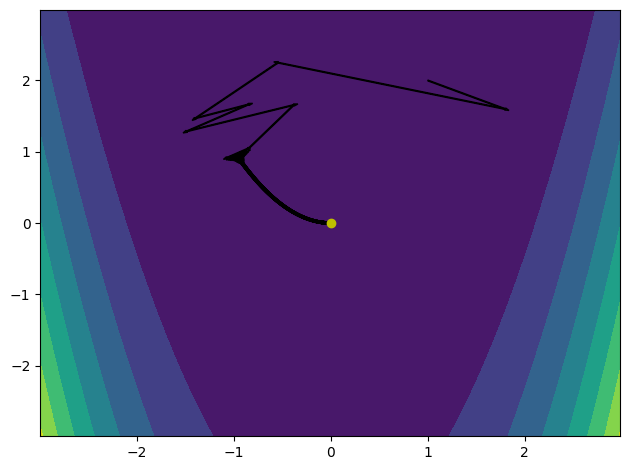

In [12]:
ground_truth = [0, 0]
seq_1 = pd.DataFrame(seq_1)
contour_plot(seq_1, loss_seq_1, ground_truth)

### Question - 2.2 - Optimising the Rosenbrock function using momentum update
Notes:
1. We have used the same initialisation vector we have previously used for the normal gradient descent method. 

In [13]:
epochs = 10000
learning_rate = 0.001
beta = 0.8
tolerence = 0.001
max_limit_2 = 1
w_init = w_init
mom_init = np.array([0, 0])

In [14]:
def polyak_update(w_now, mom_now, learning_rate, beta, tolerence):
    '''
    For a given value of weight, momentum, it does a polyak momentum
    and returns the new weight, momentum, and loss
    '''
    mom_new = beta*mom_now - learning_rate*gradient_function(w_now)
    w_new = w_now + mom_new
    loss = rosenborck_function(w_new[0], w_new[1])
    if(loss < tolerence):
        print("Loss: ")
        print(loss)
        return w_new, mom_new, loss, 0
    return w_new, mom_new, loss, 1

In [15]:
seq_2 = []
loss_seq_2 = []
w_now = w_init
mom_now = mom_init
print("Initial Paramters: ")
print(w_init)
for i in range(epochs):
    seq_2 += [w_now]
    w_now, mom_now, loss, cont = polyak_update(w_now, mom_now, learning_rate, beta, tolerence)
    loss_seq_2 += [loss]
    if(not cont):
        print("Epochs:", i+1)
        break
if(cont):
    print("Epochs:", loss)
print("Final Parameters:")
print(w_now)

Initial Paramters: 
[1 2]
Loss: 
0.0009910846841551075
Epochs: 534
Final Parameters:
[0.03148092 0.00101018]


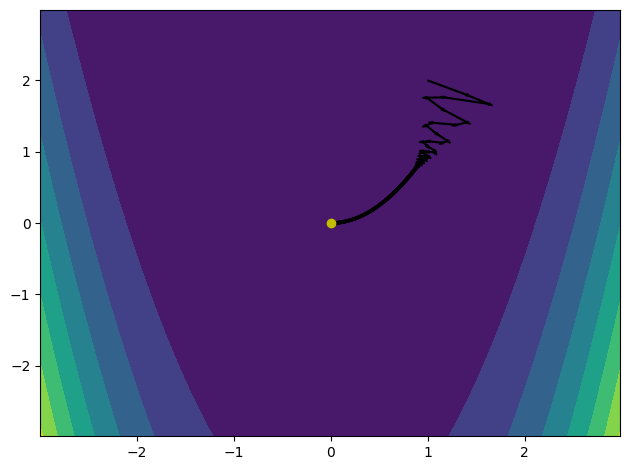

In [16]:
ground_truth = [0, 0]
seq_2 = pd.DataFrame(seq_2)
contour_plot(seq_2, loss_seq_1, ground_truth)

### Question - 2.3 - Nesterov's Accelerated Gradient

In [17]:
epochs = 10000
learning_rate = 0.0009
beta = 0.9
w_now = w_init
tolerence = 0.001
mom_init = np.array([0, 0])
mom_now = mom_init

In [18]:
def nesterov_update(w_now, mom_now, learning_rate, beta, tolerence):
    mom_new = beta*mom_now - learning_rate*gradient_function(w_now + beta*mom_now)
    w_new = w_now + mom_new
    loss = rosenborck_function(w_new[0], w_new[1])
    if(loss < tolerence):
        print("Loss: ")
        print(loss)
        return w_new, mom_new, loss, 0
    return w_new, mom_new, loss, 1

In [19]:
seq_3 = []
loss_seq_3 = []
print("Initial Paramters:")
print(w_now)
for i in range(epochs):
    seq_3 += [w_now]
    w_now, mom_now, loss, cont = nesterov_update(w_now, mom_now, learning_rate, beta, tolerence)
    loss_seq_3 += [loss]
    if(not cont):
        print("Epochs: ", i+1)
        break
if(cont):
    print("Epochs:", epochs)
print("Final Parameters")
print(w_now)

Initial Paramters:
[1 2]
Loss: 
0.0009567865706106892
Epochs:  142
Final Parameters
[-0.03093158  0.00097219]


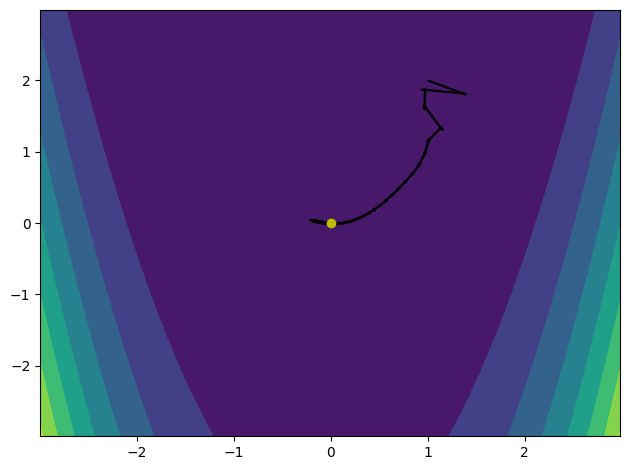

In [20]:
ground_truth = [0, 0]
seq_3 = pd.DataFrame(seq_3)
contour_plot(seq_3, loss_seq_3, ground_truth)

### Question - 2.4 - Adam Optimizer

Notes: 
1. The parameters are chosen from the following website, being optimum for a general problem.
2. 

In [21]:
alpha = 0.001
beta_1 = 0.9
beta_2 = 0.9
epsilon = 1e-08
learning_rate = 0.2
w_now = w_init
mom_now = mom_init
mom_s_now = np.array([0, 0])
tolerence = 0.001

In [22]:
def adam_update(w_now, mom_now, mom_s_now, learning_rate, tolerence, beta_1, beta_2, epsilon, iteration):
    gradient = gradient_function(w_now)
    mom_new = beta_1*mom_now + (1- beta_1)*(gradient)
    mom_s_new = beta_2*(mom_s_now) + (1 - beta_2)*(gradient**2)
    w_new = [0]*len(w_now)
    for i in range(len(w_new)):
        w_new[i] = w_now[i] - (learning_rate*(mom_new[i])/(np.sqrt(mom_s_new[i]) + epsilon))
    # print(w_new)
    w_new = np.array(w_new)
    # w_new = w_now - learning_rate*(alpha*mom_new)/(np.sqrt(mom_s_new + epsilon))
    loss = rosenborck_function(w_new[0], w_new[1])
    if(loss < tolerence):
        print("Loss:")
        print(loss)
        return w_new, mom_new, mom_s_new,loss, 0
    return w_new, mom_new, mom_s_new,loss,  1

In [23]:
seq_4 = []
loss_seq_4 = []
print("Initial Paramters:")
print(w_now)
# print(w_now, mom_now, mom_s_now, learning_rate, tolerence, beta_1, beta_2, alpha, epsilon)
for i in range(epochs):
    seq_4 += [w_now]
    w_now, mom_now, mom_s_now, loss, cont = adam_update(w_now, mom_now, mom_s_now, learning_rate, tolerence, beta_1, beta_2, epsilon, i+1)
    loss_seq_4 += [loss]
    if(not cont):
        print("Epochs: ", i+1)
        break
if(cont):
    print("No Convergence")
else:
    print("Final Parameters")
    print(w_now)    

Initial Paramters:
[1 2]
Loss:
0.0002884215008212025
Epochs:  119
Final Parameters
[0.0169581  0.00037947]


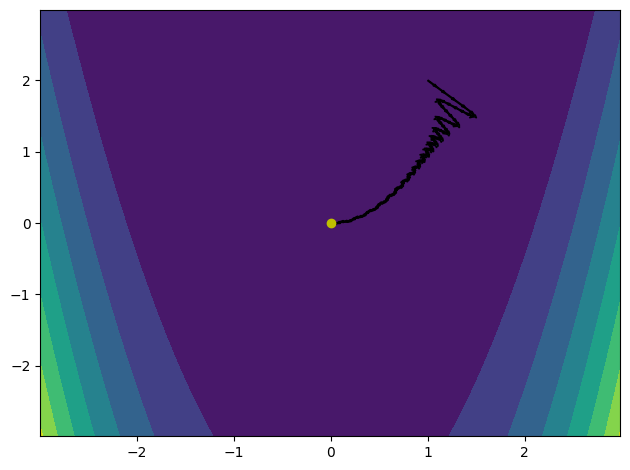

In [24]:
ground_truth = [0, 0]
seq_4 = pd.DataFrame(seq_4)
contour_plot(seq_4, loss_seq_4, ground_truth)